In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
import xgboost as xgb
color = sns.color_palette()

#%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

/home/simon/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_df = pd.read_csv("../input/train.csv")

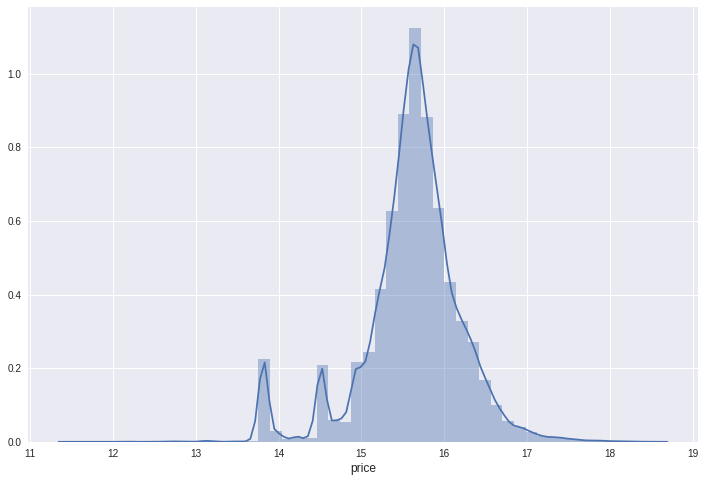

In [3]:
plt.figure(figsize=(12,8))
sns.distplot(np.log(train_df.price_doc.values), bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [4]:
for f in train_df.columns:
    if train_df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))
        
train_y = np.log(train_df.price_doc.values)
train_X = train_df.drop(["id", "timestamp", "price_doc"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

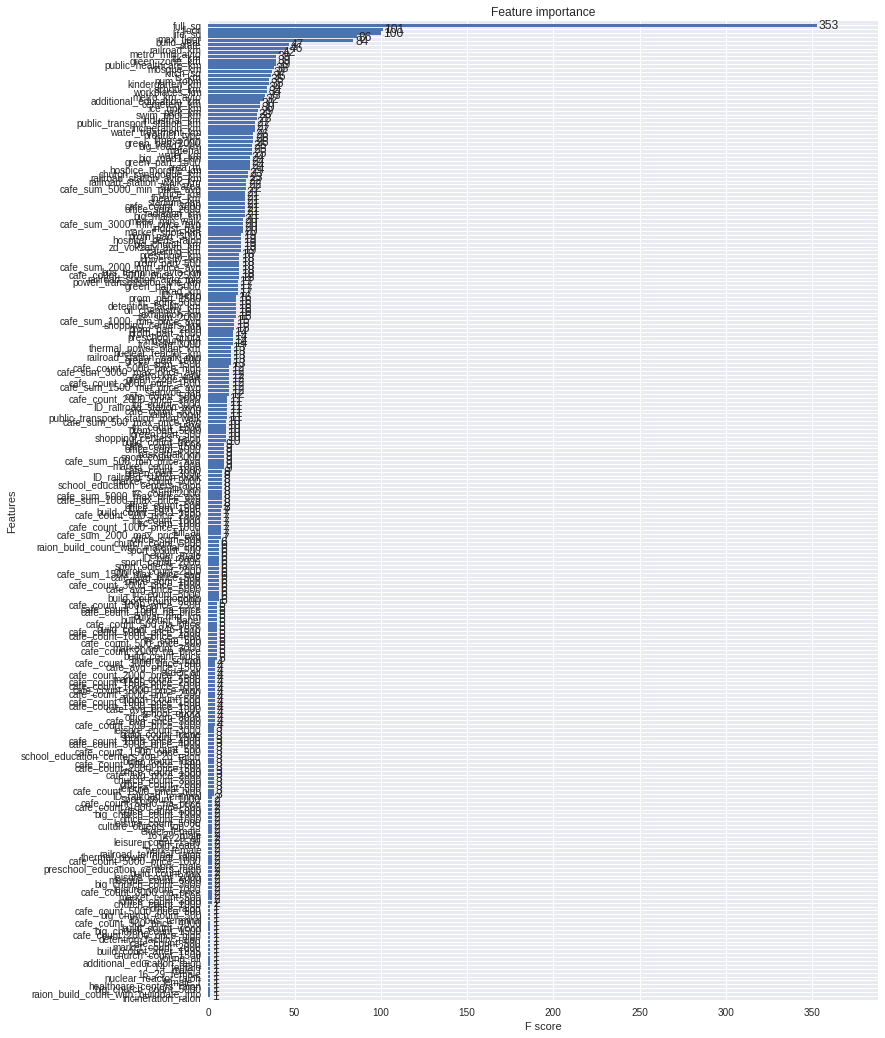

In [19]:
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()


/home/simon/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until
/home/simon/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':
/home/simon/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  # Remove the CWD from sys.pa

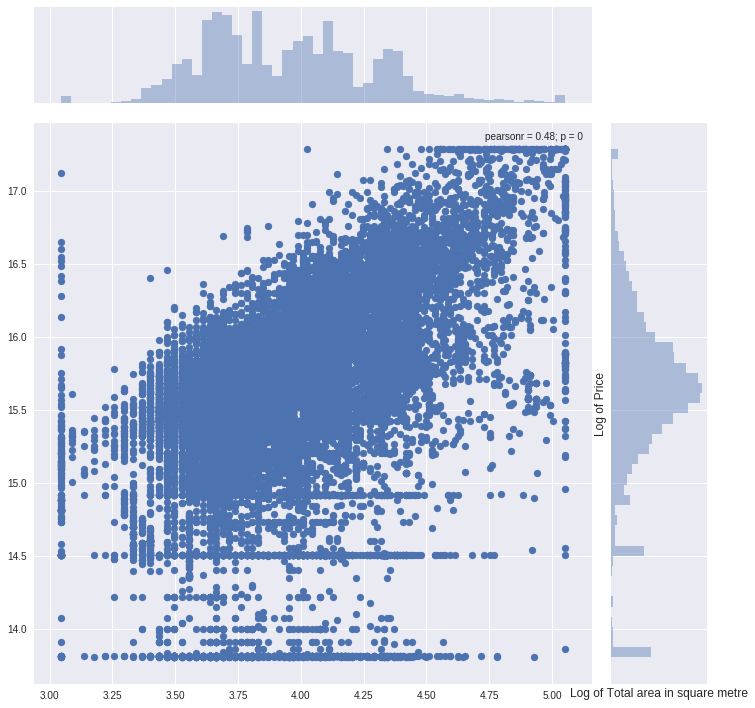

In [23]:
ulimit = np.percentile(train_df.price_doc.values, 99.5)
llimit = np.percentile(train_df.price_doc.values, 0.5)
train_df['price_doc'].ix[train_df['price_doc']>ulimit] = ulimit
train_df['price_doc'].ix[train_df['price_doc']<llimit] = llimit

col = "full_sq"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].ix[train_df[col]>ulimit] = ulimit
train_df[col].ix[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=np.log1p(train_df.full_sq.values), y=np.log1p(train_df.price_doc.values), size=10)
plt.ylabel('Log of Price', fontsize=12)
plt.xlabel('Log of Total area in square metre', fontsize=12)
plt.show()



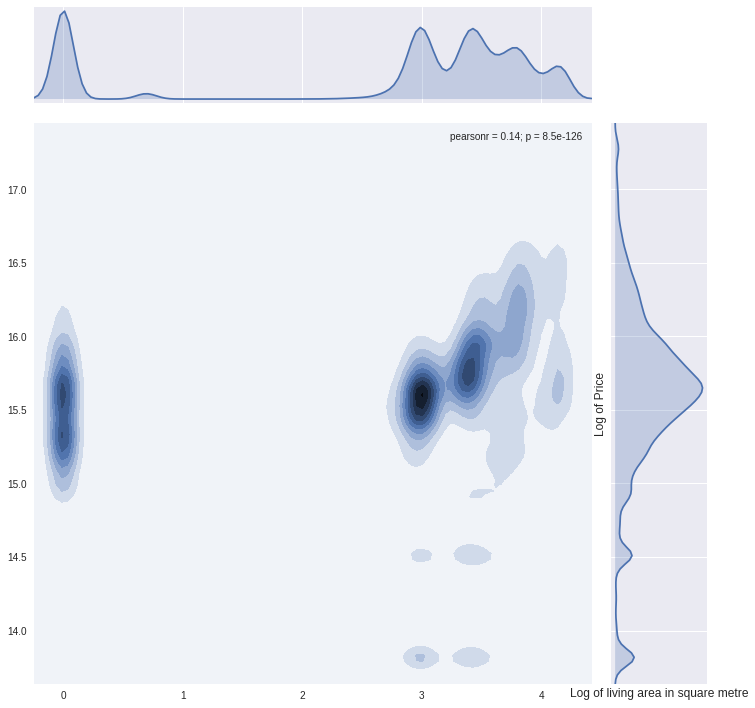

In [25]:
col = "life_sq"
train_df[col].fillna(0, inplace=True)
ulimit = np.percentile(train_df[col].values, 95)
llimit = np.percentile(train_df[col].values, 5)
train_df[col].ix[train_df[col]>ulimit] = ulimit
train_df[col].ix[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=np.log1p(train_df.life_sq.values), y=np.log1p(train_df.price_doc.values), 
              kind='kde', size=10)
plt.ylabel('Log of Price', fontsize=12)
plt.xlabel('Log of living area in square metre', fontsize=12)
plt.show()



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
import xgboost as xgb
color = sns.color_palette()

#%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

/home/simon/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_df = pd.read_csv("../input/train.csv")

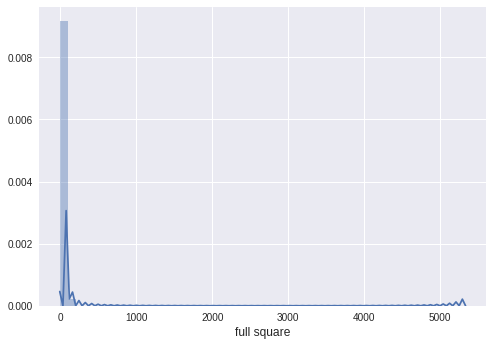

In [5]:
sns.distplot(train_df.full_sq.values, bins=50, kde=True)
plt.xlabel('full square', fontsize=12)
plt.show()

/home/simon/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


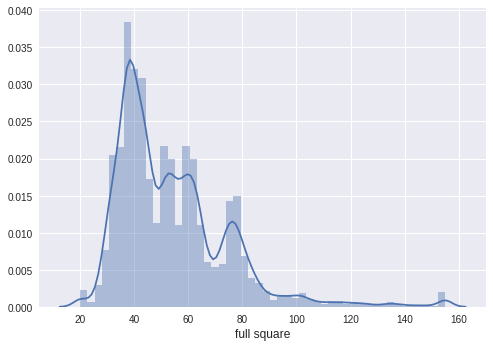

In [7]:
ulimit = np.percentile(train_df.full_sq.values, 99.5)
llimit = np.percentile(train_df.full_sq.values, 0.5)

train_df['full_sq'].ix[train_df['full_sq']>ulimit] = ulimit
train_df['full_sq'].ix[train_df['full_sq']<llimit] = llimit


sns.distplot(train_df.full_sq.values, bins=50, kde=True)
plt.xlabel('full square', fontsize=12)
plt.show()

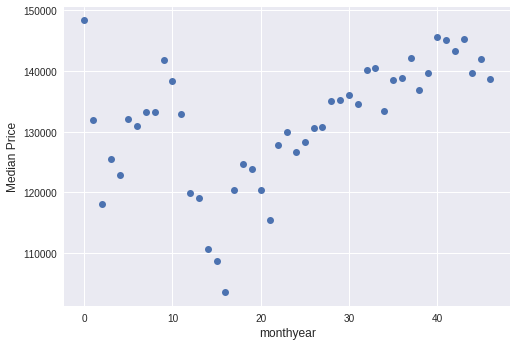

In [108]:
# train_df['timestamp']

train_df['yearmonth'] = train_df['timestamp'].apply(lambda x: x[:4]+x[5:7])
train_df['ppa'] = train_df['price_doc'] / train_df['full_sq']
g_ppa_df = train_df.groupby('yearmonth')['ppa'].aggregate(np.mean).reset_index()
# plt.figure(figsize=(12,8))

plt.plot(g_ppa_df['ppa'], 'o')
# sns.boxplot(x='yearmonth', y="ppa", data=grouped_df)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('monthyear', fontsize=12)
# plt.xticks(rotation='vertical')
plt.show()


# grouped_df = train_df.groupby('timestamp')['price_doc'].aggregate(np.mean).reset_index()
# plt.figure(figsize=(12,8))
# sns.boxplot(x='timestamp', y="price_doc", data=grouped_df)
# plt.ylabel('Median Price', fontsize=12)
# plt.xlabel('timestamp', fontsize=12)
# plt.xticks(rotation='vertical')
# plt.show()



In [120]:
macro_df = pd.read_csv("../input/macro.csv")
macro_df_ym = macro_df['timestamp'].apply(lambda x: x[:4]+x[5:7])
macro_df = macro_df.drop(["timestamp"], axis=1)
for f in macro_df.columns:
    if macro_df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(macro_df[f].values)) 
        macro_df[f] = lbl.transform(list(macro_df[f].values))
# print macro_df.dtypes.reset_index()
macro_df['yearmonth'] = macro_df_ym
g_macro_data = macro_df.groupby('yearmonth').aggregate(np.mean).reset_index()
g_macro_data_1 = g_macro_data.loc[19:65,:].reset_index() # train
g_macro_data_2 = g_macro_data.loc[66:76,:].reset_index() # test

In [140]:
train_df['yearmonth'][0]

'201108'

In [121]:
train_y = g_ppa_df['ppa']
train_X = g_macro_data_1.drop(["index", "yearmonth"], axis=1)
test_X = g_macro_data_2.drop(["index", "yearmonth"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.5,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
dtest = xgb.DMatrix(test_X, feature_names=train_X.columns.values)
pred_test_y = model.predict(dtest)

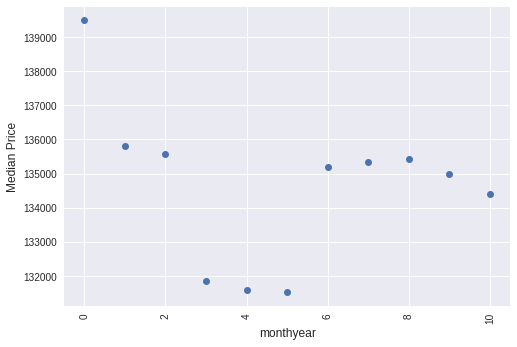

In [141]:
dtest = xgb.DMatrix(test_X, feature_names=train_X.columns.values)
pred_test_y = model.predict(dtest)


out_df = pd.DataFrame(train_y)
out_df.to_csv('train_y.csv', index=False)
out_df = pd.DataFrame(pred_test_y)
out_df.to_csv('pred_test_y.csv', index=False)


plt.plot(pred_test_y, 'o')
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('monthyear', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

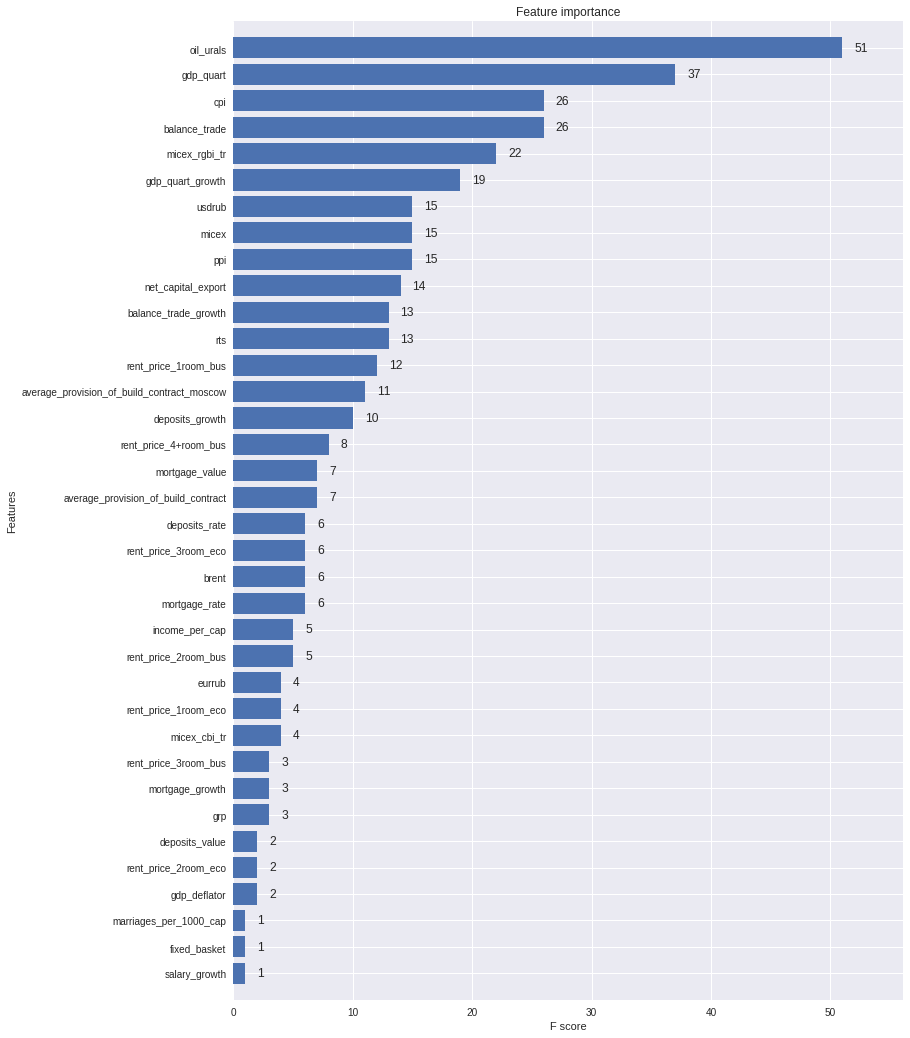

In [91]:
grouped_df = train_df.groupby('yearmonth')['ppa'].aggregate(np.mean).reset_index()
train_y = grouped_df['ppa']
train_X = grouped_macro_data.drop(["index", "yearmonth"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.5,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

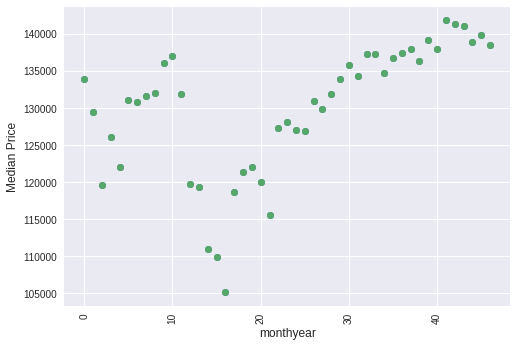

In [94]:
dtest = xgb.DMatrix(train_X, feature_names=train_X.columns.values)
pred_test_y = model.predict(dtest)

plt.plot(pred_test_y, 'o')
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('monthyear', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

0     201108
1     201109
2     201110
3     201111
4     201112
5     201201
6     201202
7     201203
8     201204
9     201205
10    201206
11    201207
12    201208
13    201209
14    201210
15    201211
16    201212
17    201301
18    201302
19    201303
20    201304
21    201305
22    201306
23    201307
24    201308
25    201309
26    201310
27    201311
28    201312
29    201401
30    201402
31    201403
32    201404
33    201405
34    201406
35    201407
36    201408
37    201409
38    201410
39    201411
40    201412
41    201501
42    201502
43    201503
44    201504
45    201505
46    201506
Name: yearmonth, dtype: object